In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_excel('Stars List.xlsx', skiprows=1)

In [3]:
df

,Constellation,Common Name,Name,HD,Hipparcos Catalogue,RA,Dec,vis.\nmag.,abs.\nmag.,Dist. (ly),Sp. class,Notes
0,UMa,Alkaid,η UMa,120315,67301,13h 47m 32.55s,+49° 18′ 47.9″,1.85,−0.60,101,B3V SB,"Benetnasch, Alkaid, Elkeid"
1,UMa,Alcor,ζ UMa,116842,65477,13h 25m 13.54s,+54° 59′ 16.7″,3.99,2,82,A5Vn,"Saidak, Suha, Arundhati; naked-eye double star..."
2,UMa,Mizar,ζ1 UMa,116656,65378,13h 23m 55.54s,+54° 55′ 31.3″,2.23,0.32,83,A2V SB,"Mizar A; spectroscopic binary, visual double s..."
3,UMa,Alioth,ε UMa,112185,62956,12h 54m 01.63s,+55° 57′ 35.4″,1.76,−0.21,81,A0p,Alioth; brown dwarf companion?; α² CVn variable
4,UMa,Megrez,δ UMa,106591,59774,12h 15m 25.45s,+57° 01′ 57.4″,3.32,1.33,81,A3Vvar,"Megrez, Kaffa"
5,UMa,Dubhe,α UMa,95689,54061,11h 03m 43.84s,+61° 45′ 04.0″,1.81,−1.08,124,F7V comp,"Dubhe, Dubh, Dubb, Thahr al Dub al Akbar, Ak"
6,UMa,Merak,β UMa,95418,53910,11h 01m 50.39s,+56° 22′ 56.4″,2.34,0.41,79,A1V,"Merak, Mirak"
7,UMa,Phecda,γ UMa,103287,58001,11h 53m 49.74s,+53° 41′ 41.0″,2.41,0.36,84,A0V SB,"Phad, Phecda, Phegda, Phekha, Phacd"


In [4]:
def convert_RA_to_Num(value):
    RA_Text = re.compile('\+?(?P<hour>[0-9]{1,2})(?P<unit>[hH°]) ?((?P<minute>[0-9]{1,2}).)? ?((?P<second>[0-9]{1,2}\.?[0-9]+).)?')
    result = RA_Text.match(value)
    if result:
        coordonate = {}
        for i in ['hour', 'minute', 'second']:
            coordonate[i] = float(result.group(i)) if result.group(i) is not None else 0
        res = coordonate['hour'] + (coordonate['minute'] / 60) + (coordonate['second'] / 3600)
        if result.group('unit') in ['h', 'H']:
            res = res * 360 / 24
    else:
        res = None
    
    return res


In [5]:
convert_RA_to_Num('12h 18m 47.9″')

184.69958333333338

In [6]:
df['RA_Num'] = df['RA'].apply(convert_RA_to_Num)
df['Dec_Num'] = df['Dec'].apply(convert_RA_to_Num)


In [7]:
df

,Constellation,Common Name,Name,HD,Hipparcos Catalogue,RA,Dec,vis.\nmag.,abs.\nmag.,Dist. (ly),Sp. class,Notes,RA_Num,Dec_Num
0,UMa,Alkaid,η UMa,120315,67301,13h 47m 32.55s,+49° 18′ 47.9″,1.85,−0.60,101,B3V SB,"Benetnasch, Alkaid, Elkeid",206.885625,49.313306
1,UMa,Alcor,ζ UMa,116842,65477,13h 25m 13.54s,+54° 59′ 16.7″,3.99,2,82,A5Vn,"Saidak, Suha, Arundhati; naked-eye double star...",201.306417,54.987972
2,UMa,Mizar,ζ1 UMa,116656,65378,13h 23m 55.54s,+54° 55′ 31.3″,2.23,0.32,83,A2V SB,"Mizar A; spectroscopic binary, visual double s...",200.981417,54.925361
3,UMa,Alioth,ε UMa,112185,62956,12h 54m 01.63s,+55° 57′ 35.4″,1.76,−0.21,81,A0p,Alioth; brown dwarf companion?; α² CVn variable,193.506792,55.959833
4,UMa,Megrez,δ UMa,106591,59774,12h 15m 25.45s,+57° 01′ 57.4″,3.32,1.33,81,A3Vvar,"Megrez, Kaffa",183.856042,57.032611
5,UMa,Dubhe,α UMa,95689,54061,11h 03m 43.84s,+61° 45′ 04.0″,1.81,−1.08,124,F7V comp,"Dubhe, Dubh, Dubb, Thahr al Dub al Akbar, Ak",165.932667,61.751111
6,UMa,Merak,β UMa,95418,53910,11h 01m 50.39s,+56° 22′ 56.4″,2.34,0.41,79,A1V,"Merak, Mirak",165.459958,56.382333
7,UMa,Phecda,γ UMa,103287,58001,11h 53m 49.74s,+53° 41′ 41.0″,2.41,0.36,84,A0V SB,"Phad, Phecda, Phegda, Phekha, Phacd",178.457250,53.694722


In [8]:
for i, txt in enumerate(df['Common Name']):
    #print(i)
    print('Dec: {}'.format(df.iloc[i][['RA_Num','Dec_Num']].values.tolist()))

Dec: [206.885625, 49.31330555555555]
Dec: [201.30641666666665, 54.987972222222226]
Dec: [200.98141666666663, 54.92536111111111]
Dec: [193.50679166666666, 55.959833333333336]
Dec: [183.85604166666667, 57.03261111111111]
Dec: [165.93266666666668, 61.75111111111111]
Dec: [165.45995833333336, 56.382333333333335]
Dec: [178.45725000000002, 53.69472222222222]


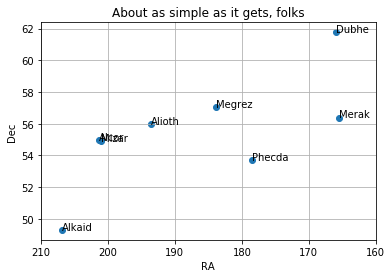

In [9]:
# Data for plotting
fig, ax = plt.subplots()
ax.scatter(df['RA_Num'], df['Dec_Num'])

ax.set(xlabel='RA', ylabel='Dec',
       title='About as simple as it gets, folks')
ax.grid()

for i, txt in enumerate(df['Common Name']):
    ax.annotate(txt, df.iloc[i][['RA_Num','Dec_Num']].values.tolist())

#fig.savefig("test.png")
plt.xlim(210, 160)
#plt.ylim(63, 45)


plt.show()

In [10]:
12*360/24

180.0

In [11]:
def orthographic_Projection(point0, point):
    R = 1
    lat = point[0] * math.pi / 180
    long = point[1] * math.pi / 180
    lat0 = point0[0] * math.pi / 180
    long0 = point0[1] * math.pi / 180
    
    x = R * math.cos(lat) * math.sin(long - long0)
    y = R * (math.cos(lat0)*math.sin(lat) - math.sin(lat0) * math.cos(lat) * math.cos(long - long0))
    c = math.sin(lat0) * math.sin(lat) + math.cos(lat0) * math.cos(lat) * math.cos(long - long0)
    
    print(f"x: {x}, y: {y}, c:{c}")
    if c >= 0:
        return (x,y)
    else:
        return None

In [12]:
orthographic_Projection((180,56), (195,49))

x: 0.11771674622792336, y: 0.25881904510252046, c:0.9587259616541789


(0.11771674622792336, 0.25881904510252046)

In [13]:
points = []
for i in df.iterrows():
    points.append(orthographic_Projection((56,180), (i[1]['Dec_Num'], i[1]['RA_Num'])))

x: 0.29480641591099377, y: -0.05802144445938945, c:0.9537938399468515
x: 0.20847467104782183, y: 0.014848734902363103, c:0.9779150405854804
x: 0.20575964153964732, y: 0.01283209276924896, c:0.9785184246137817
x: 0.13074115421410956, y: 0.01213419608174382, c:0.9913422778638125
x: 0.03659477492355329, y: 0.019042771736647368, c:0.999148735320663
x: -0.11504187680111432, y: 0.11197470620093158, c:0.987029397613512
x: -0.13899703921905898, y: 0.02137343240533751, c:0.9900621189983737
x: -0.015940659040656183, y: -0.04004590255915602, c:0.9990706787197651


In [14]:
x = []
y = []
for p in points:
    x.append(p[0])
    y.append(p[1])

(0.35, -0.2)

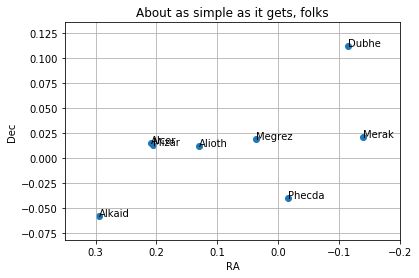

In [15]:
# Data for plotting
fig, ax = plt.subplots()
ax.scatter(x, y)

ax.set(xlabel='RA', ylabel='Dec',
       title='About as simple as it gets, folks')
ax.grid()

for i, txt in enumerate(df['Common Name']):
    ax.annotate(txt, (x[i], y[i]))

#fig.savefig("test.png")
plt.xlim(0.35, -0.20)
#plt.ylim(63, 45)

# Generate sphere

In [16]:
def generate_Meridians(start_angle=0, end_angle=360, step=10, resolution=5):
    res = []
    for i in range(start_angle, end_angle + step, step):
        meridianX = []
        meridianY = []
        for j in range(0, 360 + resolution, resolution):
            meridianX.append(j)
            meridianY.append(i)
        res.append([meridianX, meridianY])
    return res
        

In [17]:
meridians = generate_Meridians()

In [18]:
meridians[1]

[[0,
  5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100,
  105,
  110,
  115,
  120,
  125,
  130,
  135,
  140,
  145,
  150,
  155,
  160,
  165,
  170,
  175,
  180,
  185,
  190,
  195,
  200,
  205,
  210,
  215,
  220,
  225,
  230,
  235,
  240,
  245,
  250,
  255,
  260,
  265,
  270,
  275,
  280,
  285,
  290,
  295,
  300,
  305,
  310,
  315,
  320,
  325,
  330,
  335,
  340,
  345,
  350,
  355,
  360],
 [10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10]]

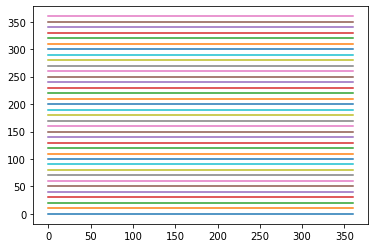

In [19]:
fig, ax = plt.subplots()
for i in meridians:
    ax.plot(i[0], i[1])

In [20]:
merid = []
for i in meridians:
    points = []
    for j in range(len(i[0])):
        coord = orthographic_Projection((20,0), (i[0][j],i[1][j]))
        if coord is not None:
            points.append(coord)
    merid.append(points)

x: 0.0, y: -0.3420201433256687, c:0.9396926207859084
x: 0.0, y: -0.25881904510252074, c:0.9659258262890684
x: 0.0, y: -0.17364817766693033, c:0.984807753012208
x: 0.0, y: -0.0871557427476582, c:0.9961946980917455
x: 0.0, y: 0.0, c:1.0
x: 0.0, y: 0.0871557427476582, c:0.9961946980917455
x: 0.0, y: 0.1736481776669303, c:0.9848077530122081
x: 0.0, y: 0.25881904510252074, c:0.9659258262890683
x: 0.0, y: 0.3420201433256687, c:0.9396926207859084
x: 0.0, y: 0.4226182617406995, c:0.90630778703665
x: 0.0, y: 0.5, c:0.8660254037844386
x: 0.0, y: 0.5735764363510462, c:0.8191520442889917
x: 0.0, y: 0.6427876096865393, c:0.7660444431189781
x: 0.0, y: 0.7071067811865475, c:0.7071067811865475
x: 0.0, y: 0.7660444431189779, c:0.6427876096865394
x: 0.0, y: 0.8191520442889919, c:0.573576436351046
x: 0.0, y: 0.8660254037844386, c:0.5
x: 0.0, y: 0.90630778703665, c:0.4226182617406994
x: 0.0, y: 0.9396926207859084, c:0.34202014332566877
x: -0.0, y: 0.9659258262890684, c:0.2588190451025207
x: -0.0, y: 0.984

x: -0.17101007166283444, y: 0.9843279493672391, c:0.04305860523005989
x: -0.1294095225512604, y: 0.984335089063668, c:0.1197397507558618
x: -0.08682408883346522, y: 0.976850844374545, c:0.19550960447757307
x: -0.043577871373829076, y: 0.9619321749210653, c:0.26979151205728336
x: -3.0616169978683836e-17, y: 0.9396926207859084, c:0.34202014332566866
x: 0.043577871373829125, y: 0.9103014384046532, c:0.4116457947859368
x: 0.08682408883346517, y: 0.8739823124221018, c:0.47813857318935715
x: 0.12940952255126045, y: 0.8310116533170695, c:0.5409924283428426
x: 0.17101007166283438, y: 0.7817164937517389, c:0.5997290044564794
x: 0.21130913087034972, y: 0.7264719996556335, c:0.6539012807199285
x: 0.24999999999999994, y: 0.665698614986362, c:0.7030969734007104
x: 0.28678821817552297, y: 0.5998588618972307, c:0.7469416735723533
x: 0.32139380484326974, y: 0.5294538206643771, c:0.7851016965923969
x: 0.3535533905932738, y: 0.4550193161633103, c:0.8172866216440066
x: 0.38302222155948906, y: 0.377121839

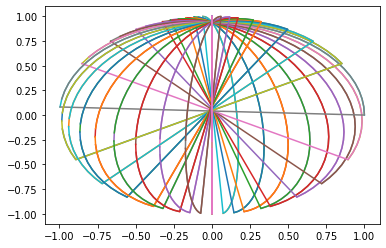

In [21]:
def rotate(l, n):
    return l[n:] + l[:n]

fig, ax = plt.subplots()
for i in merid:
    x = []
    y = []
    i = rotate(i, i.index(min(i, key=lambda k: k[0])) + 1 )
    for p in i:
        x.append(p[0])
        y.append(p[1])
    ax.plot(x, y)
#plt.xlim(0.35, -0.20)
#plt.ylim(-0.075, 0.125)

In [22]:
max(merid[5], key=lambda k: math.sqrt(k[0]**2 + k[1]**2))

(0.3830222215594891, -0.9237208365458508)

In [23]:
merid[5].index(max(merid[5], key=lambda k: math.sqrt(k[0]**2 + k[1]**2)))

24

In [24]:
len(merid[5]) - merid[5].index(min(merid[5], key=lambda k: k[0]))

14

In [25]:
len(merid[5])

37

In [26]:
def rotate(l, n):
    return l[n:] + l[:n]

rotate(merid[5], -29)

[(0.5868240888334652, 0.43561072913832105),
 (0.5416752204197018, 0.5090082074909743),
 (0.49240387650610407, 0.5785318260370622),
 (0.43938504177070503, 0.6436524680599406),
 (0.3830222215594891, 0.7038745261528966),
 (0.3237443709670646, 0.7587396740907699),
 (0.262002630229385, 0.8078303549692712),
 (0.19826689127414615, 0.8507729590651519),
 (0.13302222155948906, 0.8872406672317885),
 (0.06676517241775068, 0.9169559381902291),
 (4.6906693763513654e-17, 0.9396926207859084),
 (-0.06676517241775076, 0.9552776751354893),
 (-0.13302222155948898, 0.9635924895648582),
 (-0.19826689127414623, 0.9645737833155855),
 (-0.2620026302293849, 0.9582140881497068),
 (-0.3237443709670645, 0.9445618051875232),
 (0.3830222215594891, -0.9237208365458508),
 (0.43938504177070503, -0.8958497945801739),
 (0.49240387650610395, -0.8611607947488463),
 (0.5416752204197017, -0.8199178412863753),
 (0.5868240888334649, -0.7724348179717865),
 (0.6275068715971329, -0.7190730992835372),
 (0.6634139481689382, -0.6602